# Ch. 5: Support Vectors Machines

***
***

**Support Vector Machines**:
- Powerful AF
- Linear or nonlinear...
 - Classification
 - Regression
 - Outlier detection
- Useful for...
 - Small/medium sized datasets
 - Complex data or lots of features

***

## 5.1 - SVM Classification

### 5.1.1 - Linear Classification

#### 5.1.1.1 - Large Margin Classification

**Large margin classification**: Draw decision boundary as equidistant and orthogonal to the vector that connects two closest class instances

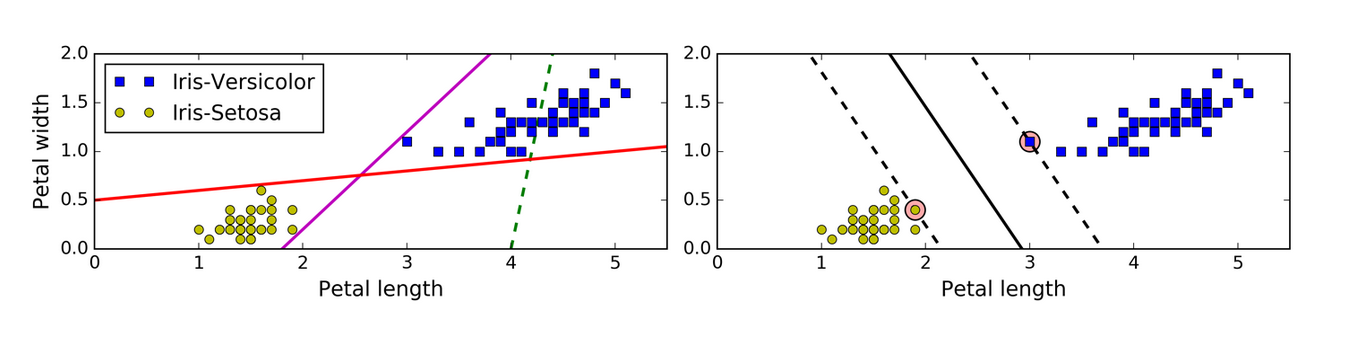

Dashed lines are called "on-the-street" and the SVM classifier tries to fit the widest possible street.

More training "off-the-street" does not affect this decision boundary (fully determined). 

**Support Vectors**: The ones that determine the boundaries of the "street"

**Support Vectors and their subsequent "streets" are very sensitive to SCALING**:

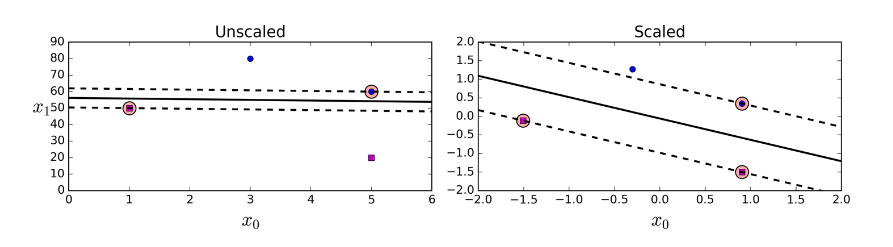

#### 5.1.1.2 Soft Margin Classification

**Soft Margin Classification**: Drawing the street boundary such that we do not demand ALL instances be on the "correct" side of the street.

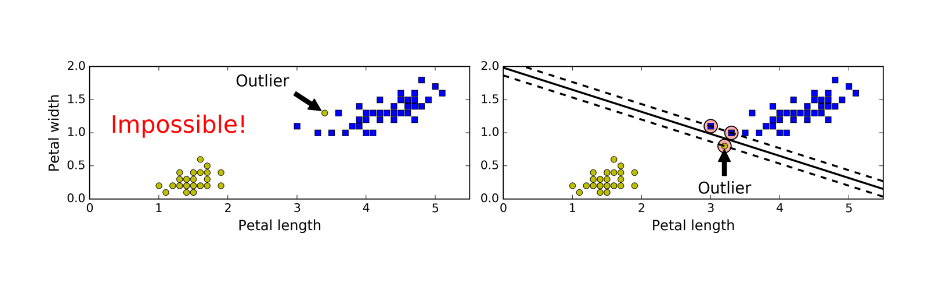

It is very sensitive to outliers/noise (if not impossible to draw boundaries)

Goals of soft margin classification...

- keep street as large as possible
- limit _margin violations_
 - instances in middle
 - instances on wrong side
 
In Scikit-Learn, _margin violations_ controlled by hyperparameter **C**
- Larger **C** = wider street, more margin violations
- Smaller **C** = narrower street, less margin violations
- see below for an example of **C** in action (reduce **C** to help mitigate overfitting)

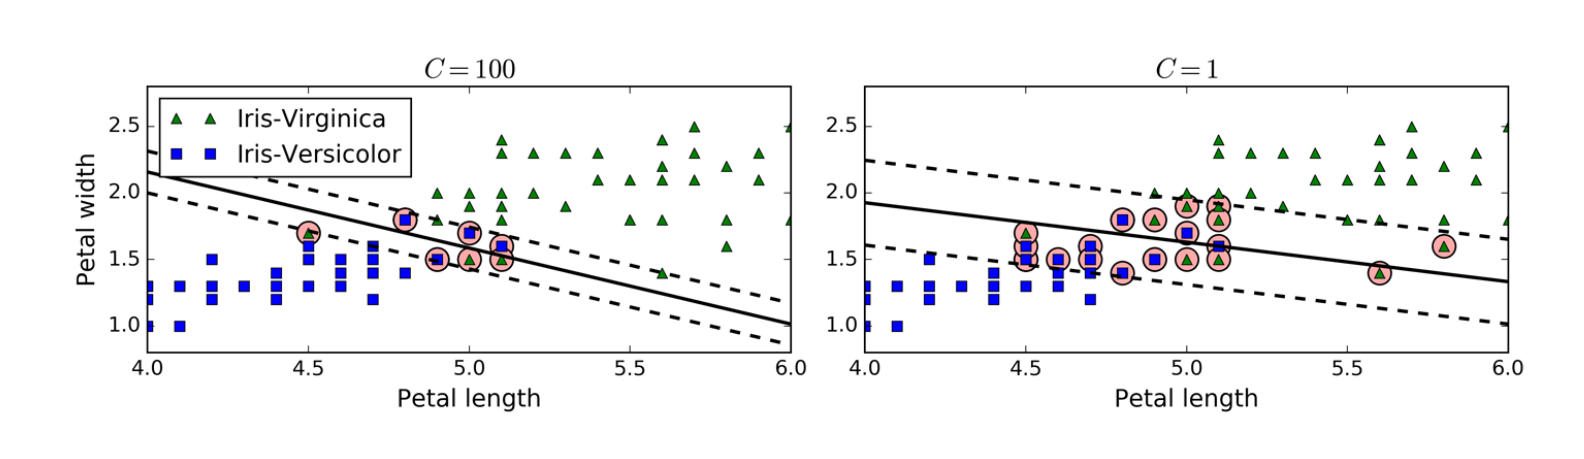

#### 5.1.1.3 Example of Linear SVM Classification in Scikit-Learn

We'll try it on the iris dataset. Keep in mind that SVMs do not output probabilities for particular classes.

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

svm_clf.predict([[5.5, 1.7]])

array([1.])

Other implementations of SVC classification:

- Use _SVC_ class and set the kernel to "linear", but it's slower.
- Use _SGDClassifier_ class with...
 - loss="hinge"
 - alpha=(1/(m*C))
 - Applies SGD to train linear SVM classifier
 - Useful for huge datasets

NOTE: LinearSVC class regularizes bias term. Center dataset by subtracting its mean (automatically done w/ _StandardScaler_. _loss_ hyperparameter "hinge" must be set. 

### 5.1.2 Nonlinear SVM Classification

#### 5.1.2.1 Nonlinear SVM Introduction

- Many datasets not linearly separable
- Could add features
 - Remember adding polynomial features in Ch. 4?
 - Some cases result in linear separable datasets
 
 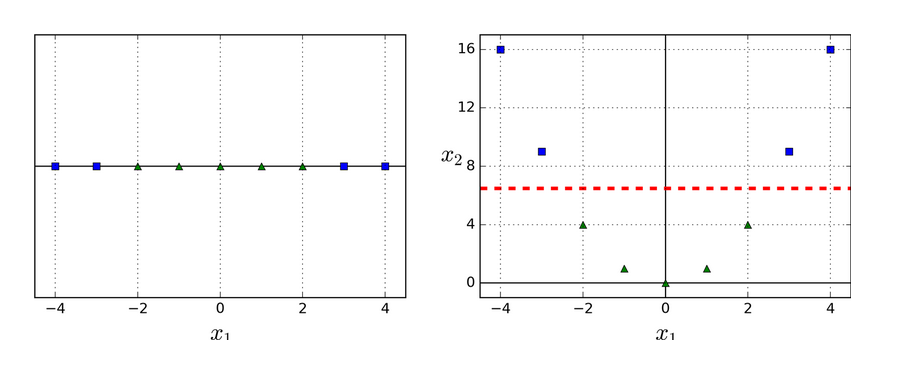
 
#### 5.1.2.1 Nonlinear SVM Implementation via Polynomial Feature Generation

Implementing polynomial feature generation...

- Create _Pipeline_
- Define a _PolynomialFeatures_ transformer
- Implement _StandardScaler_
- Call a LinearSVC class

Try it with "moons" dataset (example dataset used for binary classification. as seen below):

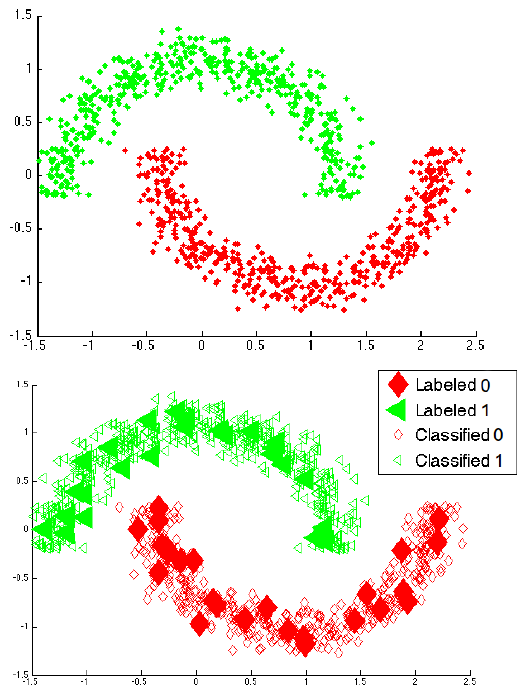

We will define the _Pipeline_ as we did above...

In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

- Pros of adding polynomial features:
 - Easy to implement
 - Can work great w/ other ML algorithms to test
- Cons of adding polynomial features:
 - @ low polynomial degrees, can't handle complex datasets (makes the model far too slow

TODO: Now, as an exercise, we can try to plot the classified data.

#### 5.1.2.2 Nonlinear SVM via Polynomial Kernal

**Kernel Trick**: 
 - Gives the same result as adding a high degree of polynomial features w/o having to actually add them
  - No combinatorial explosion

In [5]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

- Code above trains SVM classifier w/ 3rd degree polynomial kernel
- If overfitting, reduce polynomial degree
- If underfitting, increase polynomial degree
- Hyperparameter _coef0_ controls influence of higher degree polynomials v. lower degree polynomials
 - Coarse grid search to start to find proper value
 - Finer grid search after the first
 - Get a sense of what it controls to aid search
 
 
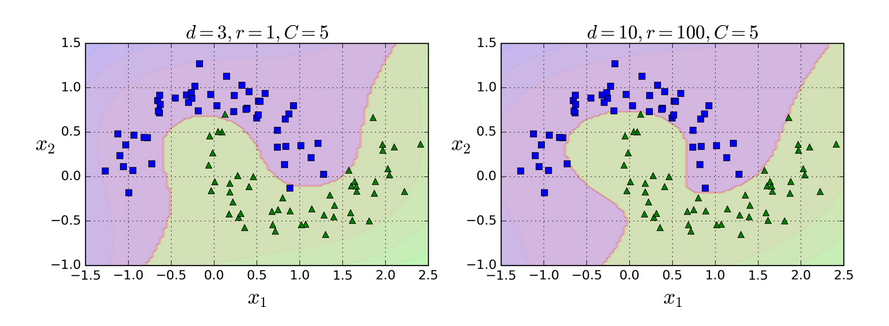

#### 5.1.2.3 Nonlinear SVM w/ Similarity Features

**Similarity Function**: A measure of how much each instance resembles a _landmark_

Example of a similarity function, _Gaussian Radical Basis Function (RBF)_:

$$ \phi_{\gamma}(\textbf{x}, C) = e^{-\gamma || \textbf{x} - C ||^2}$$

Bell shaped function
- 0 = far from landmark
- 1 = at the landmark



## 5.2 SVM Regression

